### Importing Libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


#### Data Description

- The dataset has 272 observations and 2 features. 
- The data covers the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.
- We will try to find K subgroups within the data points and group them accordingly.
- Below is the description of the features:
    - eruptions (float): Eruption time in minutes.
    - waiting (int): Waiting time to next eruption.

In [2]:
df = pd.read_csv(r"C:\Users\Ananta Arora\Documents\data\faithful.csv")

In [3]:
df.head()

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


In [29]:
df.shape

(272, 2)

### Data Cleaning

In [9]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [10]:
df.isnull().sum()

eruptions    0
waiting      0
dtype: int64

### Data Visualisation

Text(0.5, 1.0, 'Visualization of raw data')

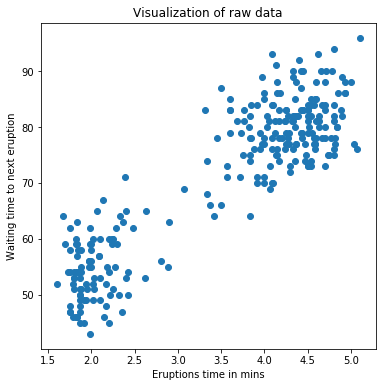

In [11]:
plt.figure(figsize=(6,6))
plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.xlabel('Eruptions time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data')

- We’ll use this data because it’s easy to plot and visually spot the clusters since its a 2-dimension dataset.
- It’s obvious that we have 2 clusters. Let’s standardize the data first and run the kmeans algorithm on the standardized data with K=2.

In [12]:
# Standardize the data
X_std = StandardScaler().fit_transform(df)
X_std

array([[ 0.09849886,  0.59712344],
       [-1.48145856, -1.24518118],
       [-0.13586149,  0.22866251],
       [-1.05750332, -0.6556437 ],
       [ 0.91744345,  1.03927655],
       [-0.53085085, -1.171489  ],
       [ 1.06402839,  1.2603531 ],
       [ 0.09849886,  1.03927655],
       [-1.34979544, -1.46625773],
       [ 0.75681445,  1.03927655],
       [-1.45249268, -1.24518118],
       [ 0.37674691,  0.96558436],
       [ 0.62515133,  0.52343125],
       [-1.52534627, -1.76102647],
       [ 1.06402839,  0.89189218],
       [-1.1593228 , -1.39256555],
       [-1.52534627, -0.6556437 ],
       [ 1.1518038 ,  0.96558436],
       [-1.65700939, -1.39256555],
       [ 0.66903904,  0.59712344],
       [-1.48145856, -1.46625773],
       [-1.52534627, -1.76102647],
       [-0.03316426,  0.52343125],
       [-0.36934409, -0.13979841],
       [ 0.91744345,  0.22866251],
       [ 0.09849886,  0.89189218],
       [-1.33487362, -1.171489  ],
       [ 0.5224541 ,  0.37604688],
       [ 0.31793739,

### Using Elbow method to find optimal number of clusters

- Firstly we will fit the k-means algorithm to our data X, for that we will create an object kmeans of class KMeans and within the class, we are going to pass several parameters;
- n_clusters called as no. of clusters
- init, which is the random initialization method. Since we don’t want to fall into the random initialization trap, we have chosen a very powerful method k-means++ instead of random.
- max_iter, which is termed as a maximum no. of iterations that defines the final cluster when the k-means algorithm is running. Here we have selected the default value i.e., 300.
- n_init, that is the no. of times the k-means algorithm will run with different initial centroids. The default value i.e., 10, is chosen by us.
- random_state, which fixes all the random factors of the k-means process.

Now that we are done making the k-means algorithm, we will now fit it to the data X using the fit() method.

- Secondly, we will compute the within cluster sum of squares independent to the wcss list. There is another name for within cluster sum of squares called as inertia. The scikit learn library has provided us with an inertia attribute that will compute within cluster sum of squares.





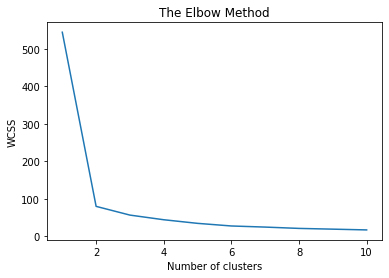

In [31]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', max_iter=300, n_init=10, random_state = 0)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

####  We can clearly see that we get two optimal clusters which can be seen from the elbow chart.

In [23]:
# Run local implementation of kmeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
print("centroids: ", km.cluster_centers_)
print("labels: ", km.labels_)

centroids:  [[-1.26008539 -1.20156744]
 [ 0.70970327  0.67674488]]
labels:  [1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]


#### Lets plot a dictionary to see which data point corresponds to which cluster.

In [24]:
my_dict = {km.cluster_centers_[i, 0]: np.where(km.labels_ == i)[0] for i in range(km.n_clusters)}

In [25]:
my_dict

{-1.2600853894290487: array([  1,   3,   5,   8,  10,  13,  15,  16,  18,  20,  21,  26,  35,
         36,  38,  41,  43,  47,  49,  52,  54,  57,  60,  62,  64,  68,
         71,  74,  76,  83,  88,  90,  92,  94,  98, 100, 102, 105, 107,
        111, 114, 116, 118, 120, 123, 126, 128, 130, 132, 134, 136, 138,
        141, 145, 147, 149, 152, 158, 160, 162, 166, 168, 170, 171, 177,
        180, 184, 187, 189, 191, 198, 200, 203, 205, 208, 210, 212, 214,
        216, 218, 220, 222, 231, 233, 235, 236, 239, 241, 243, 246, 248,
        250, 258, 262, 264, 265, 268, 270], dtype=int64),
 0.7097032653106145: array([  0,   2,   4,   6,   7,   9,  11,  12,  14,  17,  19,  22,  23,
         24,  25,  27,  28,  29,  30,  31,  32,  33,  34,  37,  39,  40,
         42,  44,  45,  46,  48,  50,  51,  53,  55,  56,  58,  59,  61,
         63,  65,  66,  67,  69,  70,  72,  73,  75,  77,  78,  79,  80,
         81,  82,  84,  85,  86,  87,  89,  91,  93,  95,  96,  97,  99,
        101, 103, 104, 10

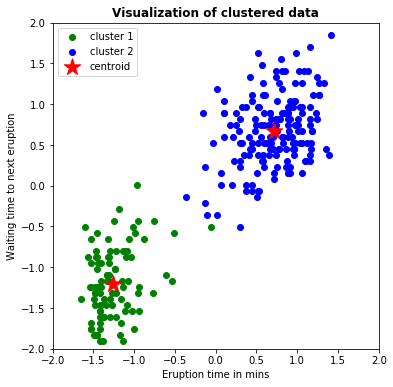

In [27]:
# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')

- Here, X_std[km.labels_ == 0, 0] means we are checking if the datapoint of the first column belongs to 0 cluster.
- Similarly, X_std[km.labels_ == 0, 1] means we are checking if the datapoint of the second column belongs to 0 cluster.

#### Using 9 different random_state to change the initialization of the centroids and plot the results.

-  The dataset is considered very easy and converges in less than 10 iterations.

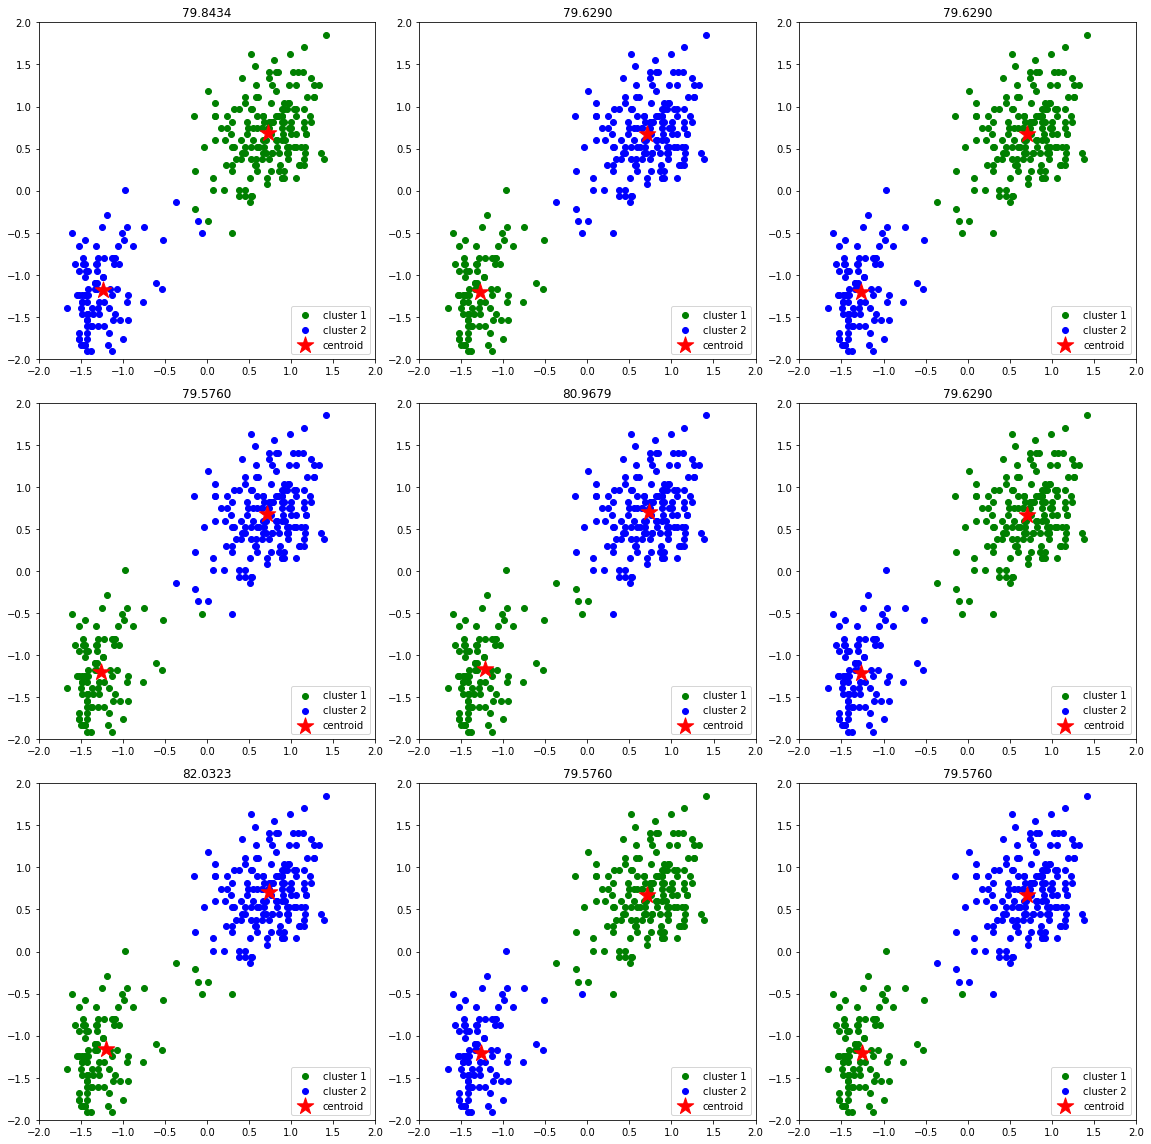

In [28]:
n_iter = 9
fig, ax = plt.subplots(3, 3, figsize=(16, 16))
ax = np.ravel(ax)
centers = []
for i in range(n_iter):
    # Run local implementation of kmeans
    km = Kmeans(n_clusters=2,
                max_iter=3,
                random_state=np.random.randint(0, 1000, size=1))
    km.fit(X_std)
    centroids = km.centroids
    centers.append(centroids)
    ax[i].scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
                  c='green', label='cluster 1')
    ax[i].scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
                  c='blue', label='cluster 2')
    ax[i].scatter(centroids[:, 0], centroids[:, 1],
                  c='r', marker='*', s=300, label='centroid')
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].legend(loc='lower right')
    ax[i].set_title(f'{km.error:.4f}')
    ax[i].set_aspect('equal')
plt.tight_layout()

#### We would pick the one with the lowest sum of squared distance.

### Silhouette Analysis
- Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:
    - Compute the average distance from all data points in the same cluster (ai).
    - Compute the average distance from all data points in the closest cluster (bi).
    - Compute the coefficient:

- The coefficient can take values in the interval [-1, 1].
    - If it is 0 –> the sample is very close to the neighboring clusters.
    - It it is 1 –> the sample is far away from the neighboring clusters.
    - It it is -1 –> the sample is assigned to the wrong clusters.

#### Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters

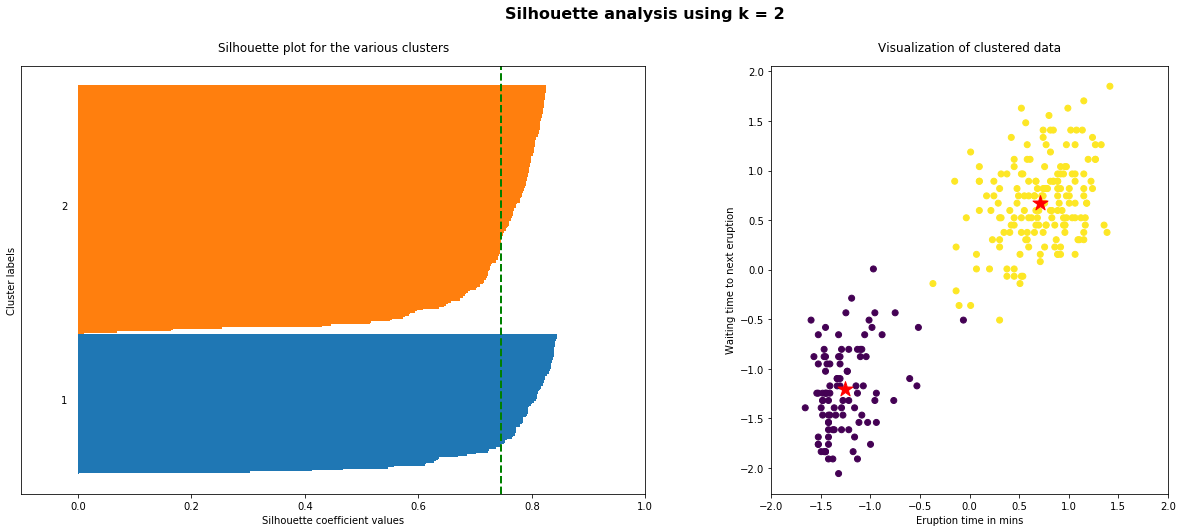

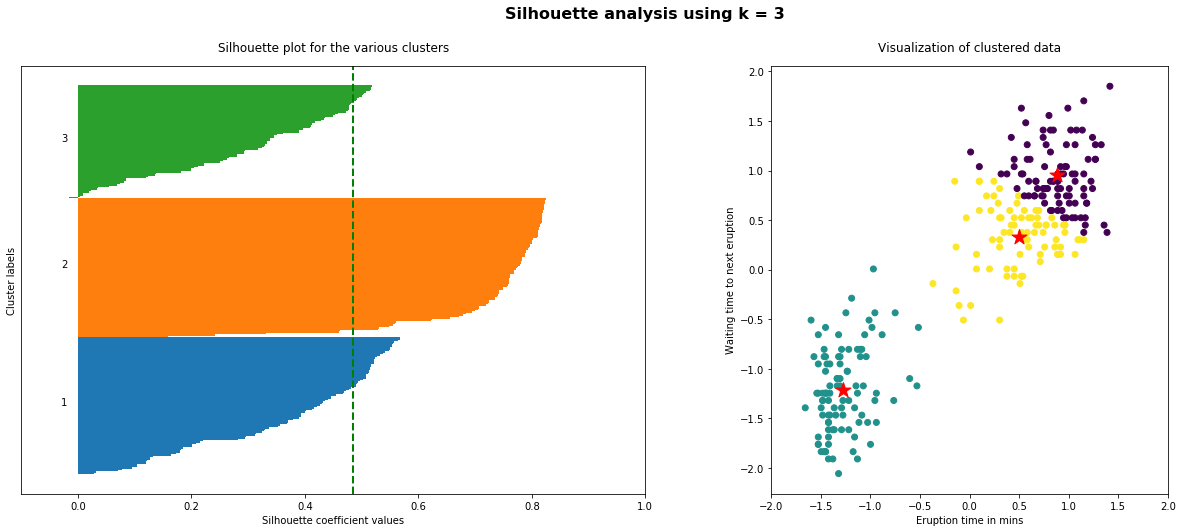

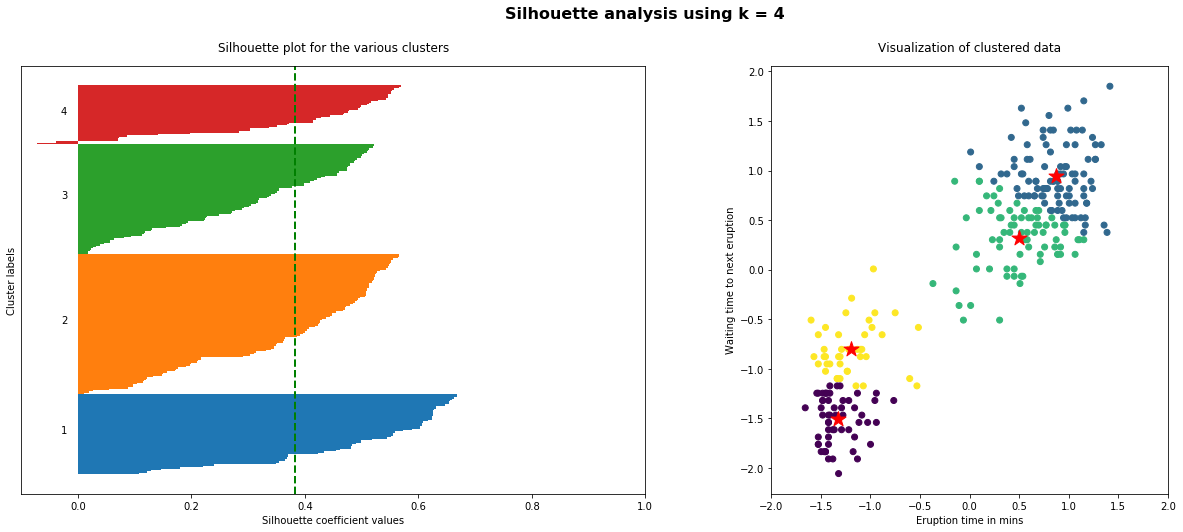

In [32]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(X_std)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X_std, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05)

### Observation:
- As the above plots show, n_clusters=2 has the best average silhouette score of around 0.75 and all clusters being above the average shows that it is actually a good choice. 
- Also, the thickness of the silhouette plot gives an indication of how big each cluster is